In [142]:
import numpy as np 
import pandas as pd
import math 
from PIL import Image, ImageDraw 
import matplotlib.pyplot as plt
import matplotlib

In [143]:
textData = pd.read_csv("../data/DX_TEST_RESULT_FULL.csv")

In [144]:
users = sorted(textData[' user_name'].unique())

In [155]:
data = {}
for k in users:
    data[k]=[]

cases_order = []    
    
for case in textData.file_name.unique():
    for user in users:
        subsample = textData[(textData.file_name == case) & (textData[' user_name'] == user)]
        shape = matplotlib.image.imread(f'../data/sample_1/{case}.png').shape
        
        samples_list = []
        for i, row in subsample.iterrows():
            img = Image.new("RGB", shape)
            
            img1 = ImageDraw.Draw(img)  
            #if row[' shape'] == 'circle':
            img1.ellipse([(row[' xcenter']-row[' rhorizontal'],
                           row[' ycenter']-row[' rvertical']),
                           (row[' xcenter']+row[' rhorizontal'],
                           row[' ycenter']+row[' rvertical'])], fill ="white")
            #else:
            #img1.rectangle([(row[' xcenter']-row[' rhorizontal'],
            #               row[' ycenter']-row[' rvertical']),
            #               (row[' xcenter']+row[' rhorizontal'],
            #               row[' ycenter']+row[' rvertical'])], fill ="white")
            sample = np.asarray(img)[:,:,1]
            samples_list.append(sample.astype(bool))
        
        if len(subsample) == 0:
            samples_array = np.array([np.zeros(shape,dtype=bool)])
        else:
            samples_array = np.stack([sum(samples_list).astype(bool)]+ samples_list)
        
        data[user].append(samples_array)
    cases_order.append(case)

In [156]:
#saving
for i in range(100):
    np.save(f'../data/ellipse/after/{cases_order[i]}.npy',data['Expert'][i])
    np.save(f'../data/ellipse/sample_1/{cases_order[i]}.npy',data['sample_1'][i])
    np.save(f'../data/ellipse/sample_2/{cases_order[i]}.npy',data['sample_2'][i])
    np.save(f'../data/ellipse/sample_3/{cases_order[i]}.npy',data['sample_3'][i])

In [146]:
n = np.argmax(tmp)

In [147]:
img_bad = matplotlib.image.imread(f'../data/after/{cases_order[n]}.png')

In [148]:
img_bad.max()

1.0

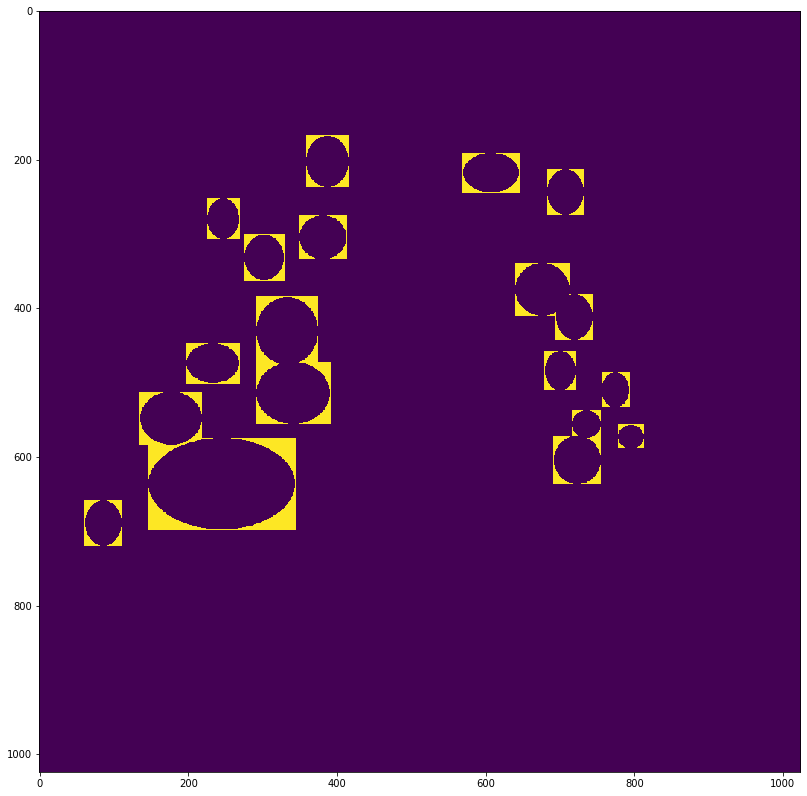

In [154]:
plt.figure(figsize=[14, 14])
plt.imshow(data['Expert'][n][0] - img_bad)

(array([26.,  0.,  0.,  0.,  1.,  2.,  0.,  1.,  6.,  1.,  1.,  2.,  2.,
         2.,  0.,  3.,  2.,  2.,  4.,  1.,  0.,  1.,  3.,  2.,  1.,  1.,
         0.,  1.,  2.,  0.,  0.,  3.,  1.,  1.,  0.,  2.,  1.,  0.,  0.,
         1.,  0.,  0.,  1.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,
         1.,  1.,  0.,  1.,  2.,  0.,  0.,  1.,  3.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.  ,   32.32,   64.64,   96.96,  129.28,  161.6 ,  193.92,
         226.24,  258.56,  290.88,  323.2 ,  355.52,  387.84,  420.16,
         452.48,  484.8 ,  517.12,  549.44,  581.76,  614.08,  646.4 ,
         678.72,  711.04,  743.36,  775.68,  808.  ,  840.32,  872.64,
         904.96,  937.28,  969.6 , 1001.92, 1034.24, 1066.56, 1098.88,
        1131.2 , 1163.52, 1195.84, 1228.16, 1260.48, 1292.8 , 1325.12,
        

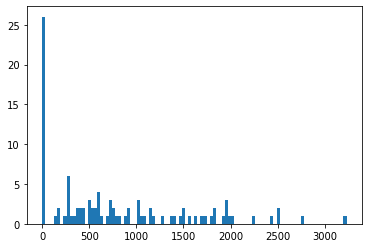

In [141]:
tmp=[]
for n in range(100):
    tmp.append(np.sum(data['Expert'][n][0]^matplotlib.image.imread(f'../data/after/{cases_order[n]}.png').astype(bool)))
plt.hist(tmp, bins=100)

In [23]:
import math 
from PIL import Image, ImageDraw 
w, h = 220, 190
shape = [(40, 40), (w - 10, h - 10)] 
  
# creating new Image object 
img = Image.new("RGB", (w, h)) 
  
# create ellipse image 
img1 = ImageDraw.Draw(img)   
img1.ellipse(shape, fill ="white") 
img.show() 

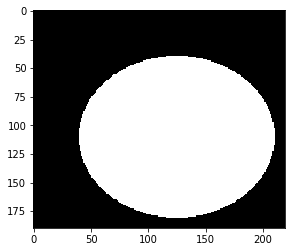

In [31]:
plt.imshow(np.asarray(img))

In [54]:
sum([np.array([1, 2, 3]), np.array([1, 2, 3])])

array([2, 4, 6])

In [58]:
(1, 2)+

(1, 2)

In [61]:
users

['Expert', 'sample_1', 'sample_2', 'sample_3']

In [120]:
textData

,file_name,user_name,xcenter,ycenter,rhorizontal,rvertical,shape,Unnamed: 7
0,00000150_002,sample_2,737.882353,690.389140,64.482655,28.573152,rectangle,NaN
1,00000181_061,sample_2,317.007541,749.466063,133.984917,198.081448,rectangle,NaN
2,00000181_061,sample_2,731.318250,926.696833,152.132730,69.502262,rectangle,NaN
3,00000181_061,sample_2,714.714932,628.609351,129.351433,216.229261,rectangle,NaN
4,00000211_019,sample_2,360.639517,589.224736,105.025641,219.318250,rectangle,NaN
...,...,...,...,...,...,...,...,...
1062,00020000_000,sample_3,314.595556,146.526823,44.373333,14.222222,rectangle,NaN
1063,00020124_003,sample_3,414.720000,352.464601,53.475556,67.697778,rectangle,NaN
1064,00020124_003,sample_3,297.358229,632.225191,122.311111,51.768889,rectangle,NaN
1065,00020124_003,sample_3,414.720000,352.464601,53.475556,67.697778,rectangle,NaN


In [129]:
round(1.6)

2